# Easy
Оценить с помощью доверительных интервалов: 
1. Выживаемость всех пассажиров (оценить среднее по isSurvived)
2. Выживаемость женщин
3. Выживаемость людей с каютами первого класса

Ответить на вопросы:
Какой вариант оценки доверительных интервалов нужно использовать в данной задаче и почему?  
Какая из ошибок более критична для данной задачи - I или II рода?

In [7]:
import pandas as pd
from scipy import stats
import math
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Необходимые нам данные не имеют пропусков, поэтому далее работаем без обработки.

В соответствии с ЦПТ: если бы мы многократно извлекали выборки из генеральной совокупности, то их средние распределились бы нормальным образом вокруг среднего генеральной совокупности со средним отклонением, равным стандартной ошибке среднего Se = Sd/sqrt(n) , посчитаем эти параметры по каждой выборке:

In [167]:
mean_value_surv = stats.tmean(df['Survived'])
mean_value_surv_w = stats.tmean(df['Survived'] & (df['Sex'] =='female'))
mean_value_surv_r = stats.tmean(df['Survived'] & (df['Pclass'] ==1))

std_surv = stats.tstd(df['Survived'])
std_surv_w = stats.tstd(df['Survived'] & (df['Sex'] =='female'))
std_surv_r = stats.tstd(df['Survived'] & (df['Pclass'] ==1))

print('Средняя выживаемость людей по выборке составит: ', round(mean_value_surv, 2))
print('И средним отклонением (люди): ', round(std_surv, 2))
print('')
print('Средняя выживаемость женщин по выборке составит: ', round(mean_value_surv_w, 2))
print('И средним отклонением (женщины)', round(std_surv_w, 2))
print('')
print('Средняя выживаемость пассажиров 1 класса по выборке составит: ', round(mean_value_surv_r, 2))
print('И средним отклонением (пассажиры 1 класса)', round(std_surv_r, 2))

# Стандартные ошибки среднего по каждой выборке:
n = 891
se_surv = std_surv / math.sqrt(n)
se_surv_w = std_surv_w / math.sqrt(n)
se_surv_r = std_surv_r / math.sqrt(n)

Средняя выживаемость людей по выборке составит:  0.38
И средним отклонением (люди):  0.49

Средняя выживаемость женщин по выборке составит:  0.26
И средним отклонением (женщины) 0.44

Средняя выживаемость пассажиров 1 класса по выборке составит:  0.15
И средним отклонением (пассажиры 1 класса) 0.36


Так как нам неизвестна дисперсия генеральной совокупности, то применяем t-тест.
  
При df => к бесконечности они не учитываются, соответственно будем использовать таблицу:
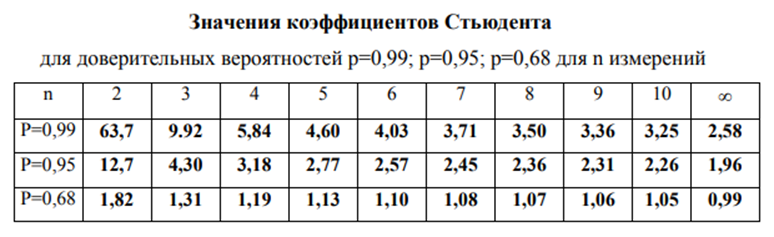  

Оценим средние значения ГС с вероятностями 95% и 99%:

In [168]:
# К-т Стьюдента для оценки доверительного интервала 95% :
z_95 = 1.96
# К-т Стьюдента для оценки доверительного интервала 99% :
z_99 = 2.58

Av_surv_95_left = mean_value_surv - z_95 * se_surv
Av_surv_95_right = mean_value_surv + z_95 * se_surv
Av_surv_99_left = mean_value_surv - z_99 * se_surv
Av_surv_99_right = mean_value_surv + z_99 * se_surv

Av_surv_w_95_left = mean_value_surv_w - z_95 * se_surv_w
Av_surv_w_95_right = mean_value_surv_w + z_95 * se_surv_w
Av_surv_w_99_left = mean_value_surv_w - z_99 * se_surv_w
Av_surv_w_99_right = mean_value_surv_w + z_99 * se_surv_w

Av_surv_r_95_left = mean_value_surv_r - z_95 * se_surv_r
Av_surv_r_95_right = mean_value_surv_r + z_95 * se_surv_r
Av_surv_r_99_left = mean_value_surv_r - z_99 * se_surv_r
Av_surv_r_99_right = mean_value_surv_r + z_99 * se_surv_r

print('С вероятностью 95% ср. знач. выживаемости в ГС находится в диапазоне = [ ', round(Av_surv_95_left,2), ';' ,  round(Av_surv_95_right,2), ']' )
print('С вероятностью 99% ср. знач. выживаемости в ГС находится в диапазоне = [ ', round(Av_surv_99_left,2), ';' ,  round(Av_surv_99_right,2), ']' )
print('')

print('С вероятностью 95% ср. знач. выживаемости женщин в ГС находится в диапазоне = [ ', round(Av_surv_w_95_left,2), ';' ,  round(Av_surv_w_95_right,2), ']' )
print('С вероятностью 99% ср. знач. выживаемости женщин в ГС находится в диапазоне = [ ', round(Av_surv_w_99_left,2), ';' ,  round(Av_surv_w_99_right,2), ']' )
print('')

print('С вероятностью 95% ср. знач. выживаемости пассажиров 1 класса в ГС находится в диапазоне = [ ', round(Av_surv_r_95_left,2), ';' ,  round(Av_surv_r_95_right,2), ']' )
print('С вероятностью 99% ср. знач. выживаемости пассажиров 1 класса в ГС находится в диапазоне = [ ', round(Av_surv_r_99_left,2), ';' ,  round(Av_surv_r_99_right,2), ']' )
print('')

С вероятностью 95% ср. знач. выживаемости в ГС находится в диапазоне = [  0.35 ; 0.42 ]
С вероятностью 99% ср. знач. выживаемости в ГС находится в диапазоне = [  0.34 ; 0.43 ]

С вероятностью 95% ср. знач. выживаемости женщин в ГС находится в диапазоне = [  0.23 ; 0.29 ]
С вероятностью 99% ср. знач. выживаемости женщин в ГС находится в диапазоне = [  0.22 ; 0.3 ]

С вероятностью 95% ср. знач. выживаемости пассажиров 1 класса в ГС находится в диапазоне = [  0.13 ; 0.18 ]
С вероятностью 99% ср. знач. выживаемости пассажиров 1 класса в ГС находится в диапазоне = [  0.12 ; 0.18 ]



In [172]:
# Проверка своего решения:

# выживаемость
conf_int_95_surv = stats.t.interval(0.95, n-1, loc=mean_value_surv, scale=se_surv)
conf_int_99_surv = stats.t.interval(0.99, n-1, loc=mean_value_surv, scale=se_surv)

# выживаемость женщин
conf_int_95_surv_w = stats.t.interval(0.95, n-1, loc=mean_value_surv_w, scale=se_surv_w)
conf_int_99_surv_w = stats.t.interval(0.99, n-1, loc=mean_value_surv_w, scale=se_surv_w)

# выживаемость пассажиров 1 класса
conf_int_95_surv_r = stats.t.interval(0.95, n-1, loc=mean_value_surv_r, scale=se_surv_r)
conf_int_99_surv_r = stats.t.interval(0.99, n-1, loc=mean_value_surv_r, scale=se_surv_r)

print(conf_int_95_surv, conf_int_99_surv)
print(conf_int_95_surv_w, conf_int_99_surv_w)
print(conf_int_95_surv_r, conf_int_99_surv_r)

(0.3518445989680297, 0.4158321687087379) (0.3417583692014114, 0.42591839847535623)
(0.23259331503312913, 0.2904145413080605) (0.2234790733771351, 0.29952878296405455)
(0.12897778099046892, 0.1762971909511697) (0.12151891916436022, 0.18375605277727838)


Таким образом, если бы мы от любого выборочного среднего откладывали б диапазон t_95*Se, то интересующее нас значение генеральной совокупности попадало бы в этот диапазон с веротяностью 95%.

Ошибки I и II рода связаны с проверкой гипотез, в нашем случае:  
Но: среднее выборки = среднему ГС  
Н1: они не равны  

Наиболее критично отклонить нулевую гипотезу, когда она верна, т.е. совершить ошибку I рода, т.к. это будет означать, что среднее генеральной совокупности может и не попасть в рассчитанный интервал даже с вероятностью 95%.

# Normal

1. Проверить гипотезу о том, что женщины выживают чаще мужчин с уровнем значимости 0.05.  
2. Проверить гипотезу о том, что дети выживают чаще, чем взрослые.

Формулировка гипотез:
1. Но: Мж = Мм (пол не влияет на выживаемость, т.е. среднее число выживших в выборке женщин и мужчин равны)  
   Н1: Мж > Мм (пол влияет на выживаемость, при чем женщины выживают чаще) 

1. Но: Мв = Мд (возраст не влияет на выживаемость, т.е. среднее число выживших в выборке взрослых и детей равны)  
   Н1: Мд > Мв (возраст влияет на выживаемость, при чем дети выживают чаще) 

In [173]:

# 1
contingency_table_1 = pd.crosstab(df['Survived'], df['Sex'])
print(contingency_table_1)

chi2, p, dof, expected = chi2_contingency(contingency_table_1)
print(f'χ²: {chi2}, p-значение: {p}')

Sex       female  male
Survived              
0             81   468
1            233   109
χ²: 260.71702016732104, p-значение: 1.1973570627755645e-58


Т.к. p-value << 0.05 и критическое значение χ² из таблицы (3.841) намного меньше рассчитанного (261), то это говорит нам об отклонении нулевой гипотезы, т.е. мы делаем статистически важный вывод о том, что зависимость между выживаемостью и полом существует, однако мы не можем указать на направление этой зависимости. Ниже проверим, действительно ли женщины выживают чаще мужчин, сравнив их средние значения:

In [174]:
mean_value_surv_w = stats.tmean(df['Survived'] & (df['Sex'] =='female'))
mean_value_surv_m = stats.tmean(df['Survived'] & (df['Sex'] =='male'))

if mean_value_surv_w > mean_value_surv_m:
    print('Женщины выживают чаще мужчин')
else:
    print('Мужчины выживают чаще женщин')

Женщины выживают чаще мужчин


Далее исследуем, влияет ли возраст пассажира на вероятность его выживания. Использвание теста ХИ-квадрат в этом случае не оптимально, так как возраст уже не является номинативной переменной (хотя можно разбить данные по возрасту на категории, однако это внесет дополнительную погрешность в результат).  

Будем работать через сравнение двух выборок, в данном случае: возраст выживших пассажиров, возраст невыживших пассажиров. Применим однофакторный дисперсионный анализ.

In [198]:
# 2
# Для начала необходимо заполнить пропуски по данным с возрастом
# Если заполним пропуски Age только медианным значением, то значительно исказится распределение, поэтому 
# разбиваем выборку на группы, где для каждой группы находим медианное значение для заполнения

df['Age'] = df['Age'].fillna(df.groupby(['Sex', 'Pclass'])["Age"].transform('median'))

groups = df.groupby('Survived')['Age'].apply(list)
f_statistic, p_value = stats.f_oneway(*groups)
print(f'F-статистика: {f_statistic}')
print(f'p-значение: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: есть статистически значимые различия между группами.")
else:
    print("Не отвергаем нулевую гипотезу: нет статистически значимых различий между группами.")

F-статистика: 3.166925959744148
p-значение: 0.07548530586358136
Не отвергаем нулевую гипотезу: нет статистически значимых различий между группами.


# Hard  
Мы отобрали 1000 человек, которые заявляют, что они экстрасенсы. Мы хотим проверить это. Для этого проводится следующий эксперимент. Перед каждым участником выкладывают 10 карт рубашкой вверх и просят угадать цвет карты (красный или черный). На уровне значимости 0.01 мы хотим быть уверены, является ли человек экстрасенсом. 
  
Нужно смоделировать ситуацию двумя способами (предполагаем, что экстрасенсов не существует и решения участников представляют собой биномиальное распределение):  
  
Без множественной проверки гипотез, выявить количество экстрасенсов с множественной проверкой гипотез, используя поправку Бонферрони (правило FWER) Сколько экстрасенсов получилось поймать в каждом из случаев?  

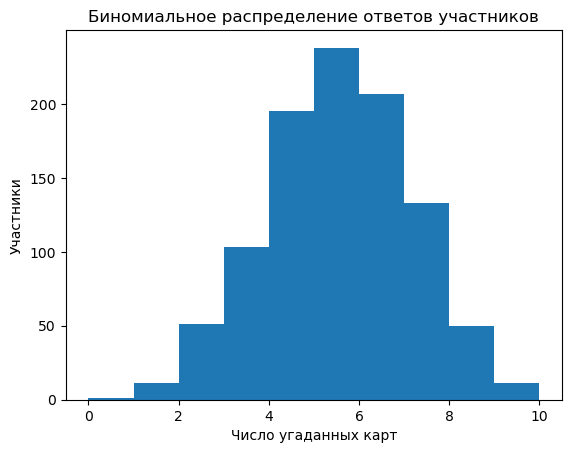

In [26]:
# Сгенерируем биномиальное распределение - 1000 ответов с вероятностью выбрать праивльн

participants = 1000    # кол-во участников 
trials = 10            # кол-во карт
p = 0.5                # вероятность отгадать цвет красный или черный

answers = np.random.binomial (trials, p, participants)
plt.hist(answers, bins=10) 
plt.title('Биномиальное распределение ответов участников')
plt.xlabel('Число угаданных карт')
plt.ylabel('Участники') ;

1. Без поправки на множественную проверку гипотез: alpha = 0.01
